# Prediction of house prices in Stockholm

In [128]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv("data/house_price.csv")
df.head()

,asked_price,final_price,pourcentage_difference,land_area,area,price_per_area,rooms,supplemental_area
0,6475000.0,6950000,7.0,635.0,117.0,59402.0,5.0,44.0
1,9950000.0,11300000,14.0,882.0,195.0,57949.0,5.0,22.0
2,5795000.0,6200000,7.0,1224.0,90.0,68889.0,6.0,90.0
3,11950000.0,12700000,6.0,542.0,110.0,115455.0,5.0,48.0
4,7950000.0,8100000,2.0,690.0,157.0,51592.0,6.0,0.0


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   asked_price             500 non-null    float64
 1   final_price             500 non-null    int64  
 2   pourcentage_difference  500 non-null    float64
 3   land_area               495 non-null    float64
 4   area                    499 non-null    float64
 5   price_per_area          499 non-null    float64
 6   rooms                   490 non-null    float64
 7   supplemental_area       500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.4 KB


In [130]:
from sklearn.model_selection import train_test_split

X = df.drop(['final_price'], axis=1)
X

,asked_price,pourcentage_difference,land_area,area,price_per_area,rooms,supplemental_area
0,6475000.0,7.0,635.0,117.0,59402.0,5.0,44.0
1,9950000.0,14.0,882.0,195.0,57949.0,5.0,22.0
2,5795000.0,7.0,1224.0,90.0,68889.0,6.0,90.0
3,11950000.0,6.0,542.0,110.0,115455.0,5.0,48.0
4,7950000.0,2.0,690.0,157.0,51592.0,6.0,0.0
...,...,...,...,...,...,...,...
495,9500000.0,24.0,624.0,164.0,71707.0,8.0,70.0
496,7295000.0,0.0,618.0,125.0,58360.0,NaN,81.0
497,9795000.0,4.0,700.0,172.0,59302.0,6.0,36.0
498,11950000.0,9.0,1307.0,174.0,74713.0,8.0,90.0


In [131]:
y = df['final_price']
y

0       6950000
1      11300000
2       6200000
3      12700000
4       8100000
         ...   
495    11760000
496     7295000
497    10200000
498    13000000
499    15000000
Name: final_price, Length: 500, dtype: int64

In [132]:
# Training Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% Training data - 20% Testing data
train_data = X_train.join(y_train)
train_data

,asked_price,pourcentage_difference,land_area,area,price_per_area,rooms,supplemental_area,final_price
249,8550000.0,15.0,396.0,150.0,65333.0,5.0,0.0,9800000
433,6495000.0,15.0,575.0,67.0,111940.0,5.0,67.0,7500000
19,7495000.0,0.0,980.0,157.0,47739.0,5.0,7.0,7495000
322,19000000.0,0.0,573.0,206.0,92233.0,7.0,95.0,19000000
332,5850000.0,8.0,1262.0,127.0,49606.0,NaN,82.0,6300000
...,...,...,...,...,...,...,...,...
106,6995000.0,44.0,665.0,136.0,74265.0,6.0,53.0,10100000
270,9995000.0,2.0,1082.0,250.0,40800.0,8.0,146.0,10200000
348,9900000.0,11.0,1206.0,200.0,55000.0,7.0,118.0,11000000
435,8995000.0,8.0,939.0,235.0,41277.0,7.0,33.0,9700000


In [133]:
X_test

,asked_price,pourcentage_difference,land_area,area,price_per_area,rooms,supplemental_area
361,7125000.0,23.0,910.0,165.0,53030.0,6.0,61.0
73,8750000.0,5.0,475.0,95.0,96842.0,5.0,49.0
374,14000000.0,0.0,1100.0,144.0,97222.0,7.0,50.0
155,6495000.0,2.0,663.0,119.0,55882.0,5.0,0.0
104,7150000.0,2.0,683.0,146.0,49829.0,6.0,0.0
...,...,...,...,...,...,...,...
347,11000000.0,0.0,562.0,101.0,108911.0,5.0,50.0
86,5000000.0,0.0,814.0,117.0,42735.0,5.0,26.0
75,14900000.0,1.0,265.0,157.0,94427.0,7.0,71.0
438,8495000.0,15.0,336.0,92.0,105978.0,5.0,51.0


In [134]:
y_test

361     8750000
73      9200000
374    14000000
155     6650000
104     7275000
         ...   
347    11000000
86      5000000
75     14825000
438     9750000
15      6995000
Name: final_price, Length: 100, dtype: int64

array([[<Axes: title={'center': 'asked_price'}>,
        <Axes: title={'center': 'pourcentage_difference'}>,
        <Axes: title={'center': 'land_area'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'price_per_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'supplemental_area'}>,
        <Axes: title={'center': 'final_price'}>, <Axes: >]], dtype=object)

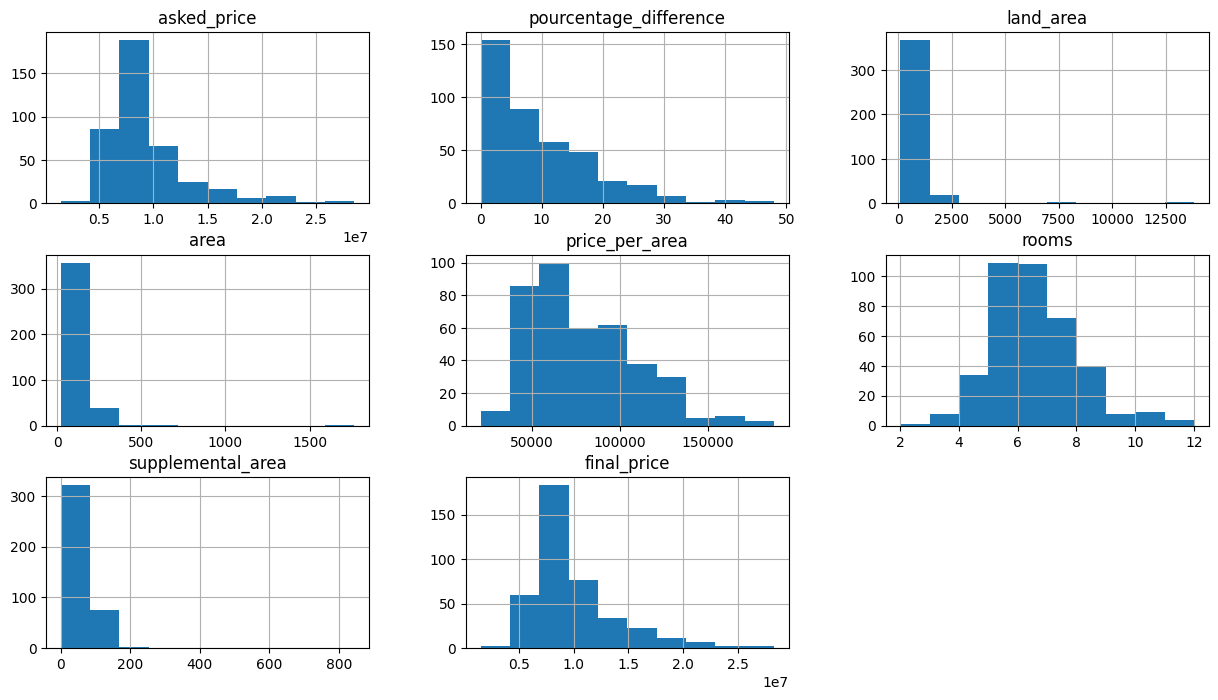

In [135]:
train_data.hist(figsize=(15,8))

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42))
])

# Training model
pipeline.fit(X_train, y_train)

# Predictions & evaluation
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'R2 Score: {r2:.2f}%') # 94% of price variation
print(f'MAE: {mae:.0f} SEK') # 412 000 SEK 


R2 Score: 0.94%
MAE: 412193 SEK
